<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 Plotting
First problem that we had during the plotting was the font size. We can change the font size by specifying the fontsize method of pyplot, but for this we need to specify everywhere the fontsize. This becomes cumbersome task, especially when you want to make many plots. There is another way to come out of this problem, by updating the prcParams method of plt. The updating is done in the following manner.

In [7]:
import matplotlib.pyplot as plt
params = {'axes.labelsize': 17,
          'font.size': 17,
          'legend.fontsize': 17,
          'xtick.labelsize': 17,
          'ytick.labelsize': 17,
          'text.usetex': False,
          'font.size':17}

plt.rcParams.update(params)

The name of the parameters are self explaining. If we want to keep the same font size for all kind of text (e.g. ticks, labels, legend etc.), we can simply update text.fontsize. It is a good practice to write this before making plots and define the value which suits you. If later you want to change font size for some attribute of plot, you can define that particular value there. Henceforth, we will be using these fontsizes in all plots.

## 7.1 Date axis
Most of the data in hydrology is time series data. To plot such data, it is required that x − axis should be time axis, and on y − axis the data should be plotted. We will be using timeseries library of scikits package to deal with time series data, which also provides functions to plot time series data. We will generate some data at regular (daily) interval which is like having data simulated using some model, and some data at random time which is like having measurements at irregular interval. The measurement data also contains corresponding vectors for time i.e. year, month and day.

We begin with creating a synthetic time series data. We will be using "pandas" dataframe for this purpose. Let us first create a normal dataframe.

In [13]:
import pandas as pd

data = {}
data['Date'] = ['2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', 
                '2022-09-29', '2022-09-30' ]
data['Rainfall'] = [0, 0, 2, 4, 10, 17]
data['PET'] = [8.7, 7.9, 5.8, 6.1, 4.5, 5.2]
data['AET'] =  [5.9, 4.8, 4.5, 5.3, 4.1, 5.2]

# Create panda dataframe
df = pd.DataFrame(data)
print(df)

         Date  Rainfall  PET  AET
0  2022-09-25         0  8.7  5.9
1  2022-09-26         0  7.9  4.8
2  2022-09-27         2  5.8  4.5
3  2022-09-28         4  6.1  5.3
4  2022-09-29        10  4.5  4.1
5  2022-09-30        17  5.2  5.2


In DataFrame, first printed column is the index. As you can see, *index* are ranging from 0 to 5. These are the by default index as used in the other data structure.

To make this dataframe a time series object, we need to define date as the index, which we can do as:

In [14]:
df["Date"] = df["Date"].astype("datetime64")
df = df.set_index("Date")
print(df)

            Rainfall  PET  AET
Date                          
2022-09-25         0  8.7  5.9
2022-09-26         0  7.9  4.8
2022-09-27         2  5.8  4.5
2022-09-28         4  6.1  5.3
2022-09-29        10  4.5  4.1
2022-09-30        17  5.2  5.2


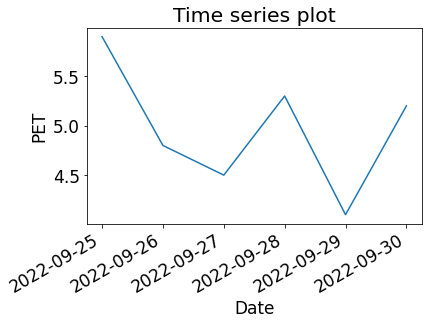

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df['AET'])
plt.xlabel("Date")
plt.ylabel("PET")
plt.title("Time series plot")
fig.autofmt_xdate()
plt.show()


*autofmt_xdate()* option format the dates to make it easy to read. Try to comment it and re-run the code.

We can plot multiple timeseries data along with labels. We can use *ncol* argument to decide the number of columns in hte legend.

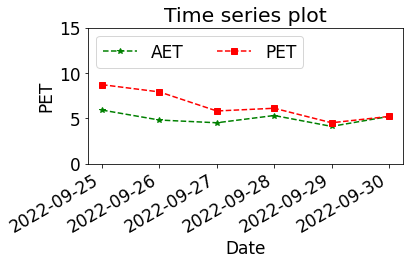

In [39]:
fig, ax = plt.subplots()
ax.plot(df['AET'], '--g*', label='AET')
ax.plot(df['PET'], '--rs', label='PET')
plt.xlabel("Date")
plt.ylabel("PET")
plt.title("Time series plot")
plt.ylim([0,15])
plt.legend(loc=2, ncol=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()